In [1]:
# Librerías a usar
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Tenemos una tabla de clientes con 3 filas (una por cliente) y 3 columnas
# x1: tarjeta de crédito (0:no, 1:sí)
# x2: otros préstamos personales (0:no, 1:sí)
# y: contrató crédito personal cuando se lo ofreció  (0:no, 1:sí)
XY_train = {"x1":[0,0,1,1],
         "x2":[0,1,0,1],
         "y": [0,1,1,1]}
XY_train = pd.DataFrame(XY_train)
XY_train

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [3]:
# Se define las variables independientes
X_train = XY_train.loc[:, ["x1","x2"]]

# Se define la variable dependiente
Y_train = XY_train.loc[:, ["y"]].values

In [4]:
# Se configura un Perceptrón de 1 neurona
capa = tf.keras.layers.Dense(units=1, input_dim=2,  activation='sigmoid')
model = tf.keras.Sequential([capa])

# Se compila el modelo
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Se entrena el modelo
historial = model.fit(x=X_train, y=Y_train, epochs=8000, verbose=False)

# Se visualiza el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


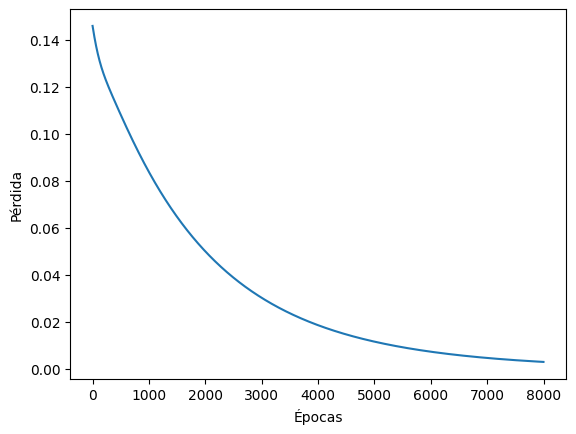

In [5]:
# Se visualiza la evolución de la función de pérdida (loss)
plt.xlabel('Épocas')
plt.ylabel("Pérdida")
plt.plot(historial.history["loss"])
plt.show()

In [6]:
# Se muestra la precisión final sobre el conjunto de entrenamiento
accuracy = historial.history['accuracy'][-1]
print("Precisión final del modelo:", accuracy)

Precisión final del modelo: 1.0


In [7]:
# Se obtienen los pesos de la capa y bias
w = model.layers[0].get_weights()[0]
w0 = model.layers[0].get_weights()[1]
w=np.insert(w, 0, w0)

print("Pesos del perceptrón:", w)


Pesos del perceptrón: [-2.4580672  5.070162   5.7600584]


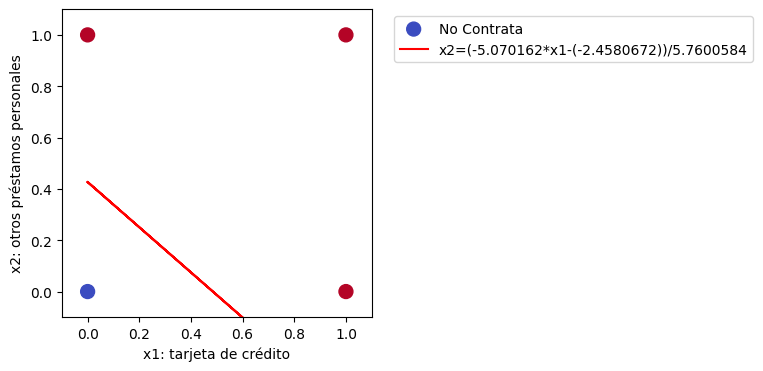

In [8]:
# Recta que soluciona el clasificador
x1 = X_train["x2"]
x2 = (-w[1] * x1  - w[0]) / w[2]

# Se pintan los datos de entrenamiento y la recta generada
plt.figure(figsize=(4, 4))

# Se dibujan los puntos x1, x2 y los valores y
plt.scatter(X_train["x1"], X_train["x2"], c=Y_train, cmap='coolwarm', marker='o', s=100, label='Datos (x1, x2) y etiquetas (y)')

# Se dibuja la recta clasificadora
plt.plot(x1, x2, 'r', label='Recta generada por los pesos')

# Se muestra el gráfico
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xlabel('x1: tarjeta de crédito')
plt.ylabel('x2: otros préstamos personales')
plt.legend(['No Contrata',"x2="+"("+str(-w[1])+"*x1-("+str(w[0])+"))/"+str(w[2])], bbox_to_anchor=(1.05, 1), loc='best')
plt.show()